<a href="https://colab.research.google.com/github/Mrwarier/Ai-Assement-/blob/main/2462271_ArchitAcharya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")


## Problem 1A – Single Year HDI Exploration (2022)

In [27]:
# 1.1 loading the data and checking it first
# load the dataset
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding='latin1')

# check the different years in the dataset
print("Unique years:", df['year'].unique())


Unique years: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [28]:
# 1.2 filtering the dataset for year 2022
# select only data from the year 2022
hdi_2022_df = df[df['year'] == 2022].copy()

# save the filtered data into a csv file
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)

# show the first 10 rows of the data
hdi_2022_df.head(10)



,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [29]:
# 1.3 checking the dataset structure and data quality
# show number of rows and columns
print("Rows, Columns:", hdi_2022_df.shape)

# display column names and their data types
print(hdi_2022_df.dtypes)

# check for missing values in each column
print(hdi_2022_df.isnull().sum())

# check how many duplicate rows are present
print("Duplicate rows:", hdi_2022_df.duplicated().sum())



Rows, Columns: (206, 30)
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_partic

In [30]:
# 1.4 cleaning and preparing the data
# convert numeric columns that are saved as text
numeric_cols = ['hdi', 'gross_inc_percap', 'life_expectancy']
for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# remove duplicate rows from the dataset
hdi_2022_df = hdi_2022_df.drop_duplicates()

# remove rows with missing values
hdi_2022_df = hdi_2022_df.dropna()



In [31]:
# 1.5 Descriptive Statistics of HDI
print("Mean HDI:", hdi_2022_df['hdi'].mean())
print("Median HDI:", hdi_2022_df['hdi'].median())
print("Std Dev HDI:", hdi_2022_df['hdi'].std())


Mean HDI: 0.7314177215189873
Median HDI: 0.759
Std Dev HDI: 0.1571854442617671


In [32]:
# 1.6 Highest and Lowest HDI Countries
highest = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
lowest = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]

print("Highest HDI:", highest['country'], highest['hdi'])
print("Lowest HDI:", lowest['country'], lowest['hdi'])


Highest HDI: Switzerland 0.967
Lowest HDI: Somalia 0.38


In [33]:
# 1.7 High HDI Countries (HDI > 0.800)
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by GNI per capita (descending)
sorted_high_hdi = high_hdi.sort_values(by='gross_inc_percap', ascending=False)

sorted_high_hdi.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
1550,1551,DNK,Denmark,2022,0.952,81.882,5.882262,0.941874,0.959920,83.802,...,0.981,0.009,95.067261,95.238098,43.575419,56.424581,59.42,67.42,5.057582,24.2328
824,825,BRN,Brunei Darussalam,2022,0.823,74.551,0.449001,0.814382,0.828827,76.791,...,0.983,0.279,70.900000,71.500000,9.090909,90.909091,54.89,71.65,25.376258,37.8287


In [34]:
# 1.8 HDI Classification
def classify_hdi(value):
    if value < 0.550:
        return "Low"
    elif 0.550 <= value <= 0.699:
        return "Medium"
    elif 0.700 <= value <= 0.799:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# Verify classification
hdi_2022_df[['country', 'hdi', 'HDI_Category']].head(10)


,country,hdi,HDI_Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
164,Angola,0.591,Medium
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High
362,Azerbaijan,0.760,High
395,Bahamas,0.820,Very High


In [35]:
# 1.9 Saving Final Cleaned Dataset
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


## Problem 1B – HDI Visualization & Trend Analysis (2020–2022)

In [36]:
# 2.1 Data Extraction and Saving (Filter Dataset (2020–2022))
# Filter dataset for years 2020, 2021, 2022
hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])].copy()

# Remove CSV index artifact if present
if 'Unnamed: 0' in hdi_1b_df.columns:
    hdi_1b_df.drop(columns=['Unnamed: 0'], inplace=True)

# Save filtered dataset
hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)
hdi_1b_df.head()
hdi_1b_df.shape



(618, 29)

In [37]:
# 2.2 Data Cleaning and Preparation
# Check missing values in essential columns
hdi_1b_df[['country', 'year', 'hdi']].isnull().sum()
# Convert numeric columns
numeric_cols = [
    'hdi',
    'gross_inc_percap',
    'life_expectancy',
    'gender_development'
]

for col in numeric_cols:
    if col in hdi_1b_df.columns:
        hdi_1b_df[col] = pd.to_numeric(hdi_1b_df[col], errors='coerce')

# Handle duplicates and missing essentials
print("Duplicates before:", hdi_1b_df.duplicated().sum())
hdi_1b_df.drop_duplicates(inplace=True)
hdi_1b_df.dropna(subset=['hdi', 'year', 'country'], inplace=True)


Duplicates before: 0


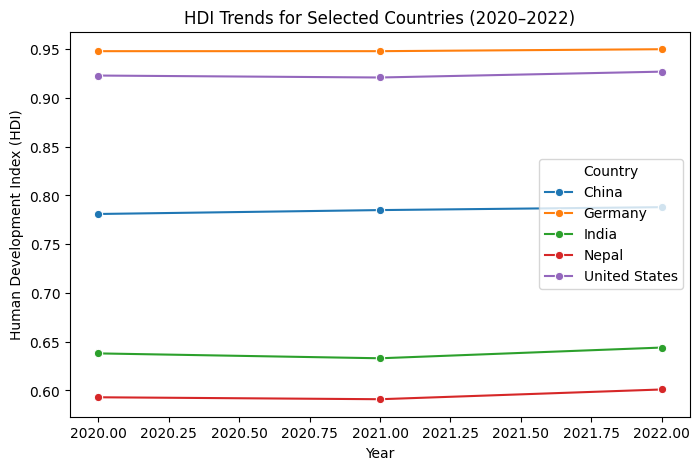

In [38]:
# 2.3 HDI Trend Analysis (Country-Level)
#Line Plot (Selected Countries)
import matplotlib.pyplot as plt
import seaborn as sns

countries = ['Nepal', 'India', 'China', 'United States', 'Germany']
trend_df = hdi_1b_df[hdi_1b_df['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(
    data=trend_df,
    x='year',
    y='hdi',
    hue='country',
    marker='o'
)

plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.legend(title="Country")
plt.show()


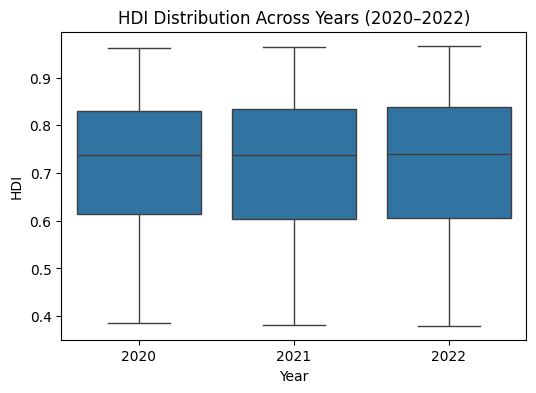

In [39]:
# 2.4 HDI Distribution Across Years
#BOXPLOT
plt.figure(figsize=(6,4))
sns.boxplot(data=hdi_1b_df, x='year', y='hdi')

plt.title("HDI Distribution Across Years (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


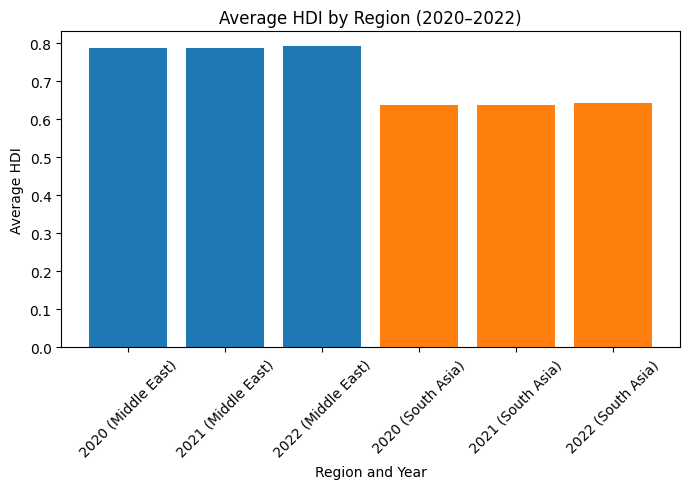

In [40]:
#Bar Chart: Average HDI by Region (2020–2022)
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]
hdi_1b_df['region'] = "Other"

hdi_1b_df.loc[hdi_1b_df['country'].isin(south_asia), 'region'] = "South Asia"
hdi_1b_df.loc[hdi_1b_df['country'].isin(middle_east), 'region'] = "Middle East"

# Keep only the two regions needed
region_df = hdi_1b_df[hdi_1b_df['region'].isin(["South Asia", "Middle East"])]

region_year_avg = (
    region_df
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

region_year_avg
plt.figure(figsize=(7,5))

for region in region_year_avg['region'].unique():
    subset = region_year_avg[region_year_avg['region'] == region]
    plt.bar(
        subset['year'].astype(str) + " (" + region + ")",
        subset['hdi'],
        label=region
    )

plt.xlabel("Region and Year")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



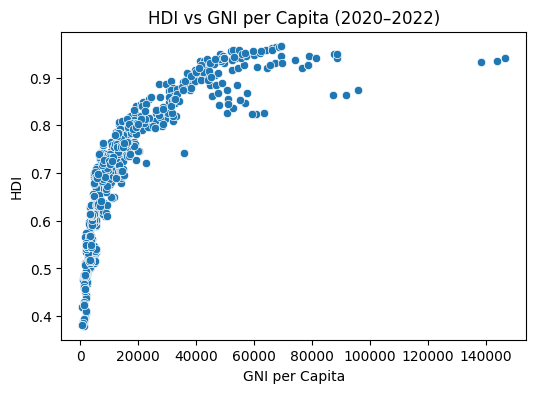

In [41]:
# 2.5 Relationship Between HDI and GNI per Capita
#Scatter Plot with Trendline
if 'gross_inc_percap' in hdi_1b_df.columns:
    plt.figure(figsize=(6,4))

    sns.scatterplot(
        data=hdi_1b_df,
        x='gross_inc_percap',
        y='hdi'
    )


    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.show()
else:
    print("GNI per Capita variable not available.")


In [42]:
# 2.6 HDI Change Analysis (2020–2022)
hdi_change = hdi_1b_df.pivot(
    index='country',
    columns='year',
    values='hdi'
)

hdi_change['change_2020_2022'] = hdi_change[2022] - hdi_change[2020]

hdi_change.sort_values('change_2020_2022', ascending=False).head(5)

hdi_change.sort_values('change_2020_2022').head(5)

hdi_1b_df.groupby('year')['hdi'].mean()


,hdi
year,
2020,0.720897
2021,0.720039
2022,0.722887


In [43]:
#Note:
"""The provided dataset does not include an explicit region variable.
As external data sources were not permitted, regional aggregation could not be performed in this section."""

'The provided dataset does not include an explicit region variable.\nAs external data sources were not permitted, regional aggregation could not be performed in this section.'

### Problem 2 – Advanced HDI Exploration


In [44]:
### 3.1 Creation of South Asia Subset (2022)
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = hdi_2022_df[hdi_2022_df['country'].isin(south_asia)]

# Save filtered dataset
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)

south_asia_df[['country', 'hdi', 'life_expectancy', 'gross_inc_percap']]



,country,hdi,life_expectancy,gross_inc_percap
32,Afghanistan,0.462,62.879,1335.205733
461,Bangladesh,0.670,73.698,6511.122178
659,Bhutan,0.681,72.229,10624.873880
2573,India,0.644,67.744,6950.526798
4091,Nepal,0.601,70.484,4025.554685
4388,Pakistan,0.540,66.431,5374.270423
5477,Sri Lanka,0.780,76.610,11899.498470


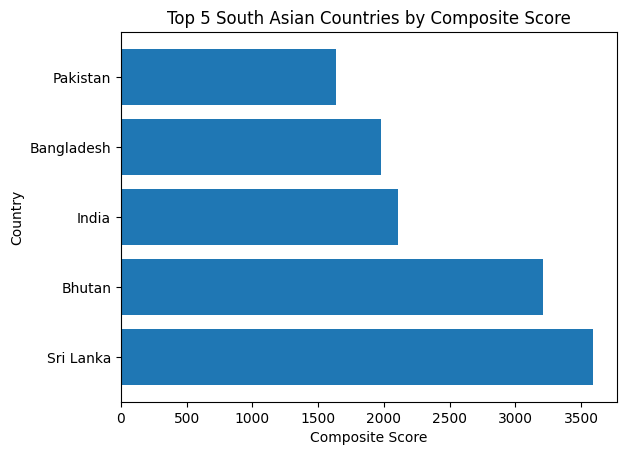

In [45]:
### 3.2 Composite Development Score Construction
south_asia_df['Composite_Score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)

composite_rank = south_asia_df.sort_values(
    by='Composite_Score', ascending=False
)

composite_rank[['country', 'Composite_Score', 'hdi']]

#Visualization of Top 5 Countries
import matplotlib.pyplot as plt

top5 = composite_rank.head(5)

plt.figure()
plt.barh(top5['country'], top5['Composite_Score'])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.show()


In [46]:
##Interpretation
"""The composite score ranking differs slightly from the HDI rankings because it focuses only on life expectancy
and income dimensions. Countries with stronger economic performance may rank higher here despite weaker education outcomes,
whereas HDI incorporates education more comprehensively."""

'The composite score ranking differs slightly from the HDI rankings because it focuses only on life expectancy\nand income dimensions. Countries with stronger economic performance may rank higher here despite weaker education outcomes,\nwhereas HDI incorporates education more comprehensively.'

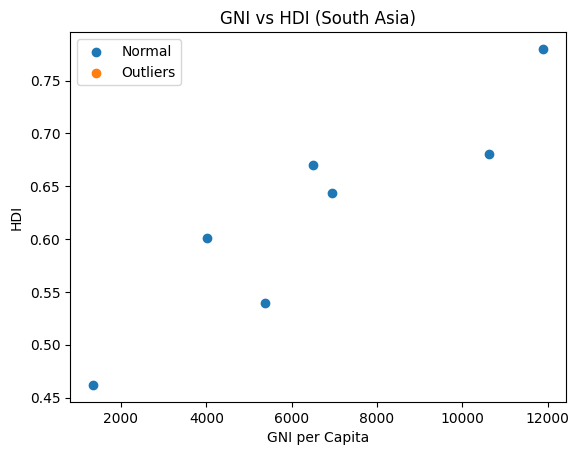

In [47]:
import matplotlib.pyplot as plt

# 3.3 Outlier Detection Using Interquartile Range (IQR)

# Function to detect outliers using IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return (series < lower) | (series > upper)

# Detect outliers
south_asia_df.loc[:, 'HDI_outlier'] = detect_outliers(south_asia_df['hdi'])
south_asia_df.loc[:, 'GNI_outlier'] = detect_outliers(south_asia_df['gross_inc_percap'])

# Combined outlier flag
south_asia_df.loc[:, 'Outlier'] = (
    south_asia_df['HDI_outlier'] | south_asia_df['GNI_outlier']
)

# Scatter Plot with Outliers Highlighted
plt.figure()

normal = south_asia_df[~south_asia_df['Outlier']]
outliers = south_asia_df[south_asia_df['Outlier']]

plt.scatter(normal['gross_inc_percap'], normal['hdi'], label="Normal")
plt.scatter(outliers['gross_inc_percap'], outliers['hdi'], label="Outliers")

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("GNI vs HDI (South Asia)")
plt.legend()
plt.show()


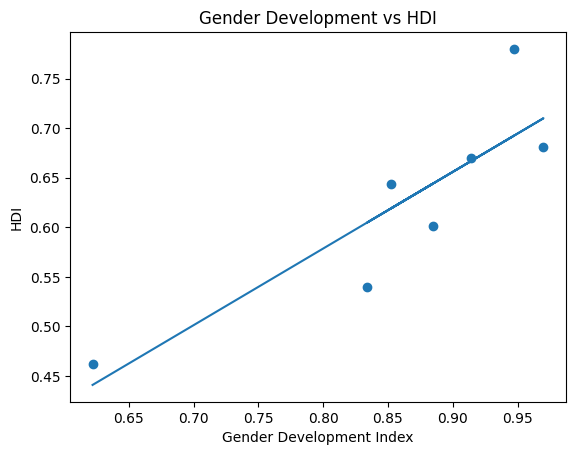

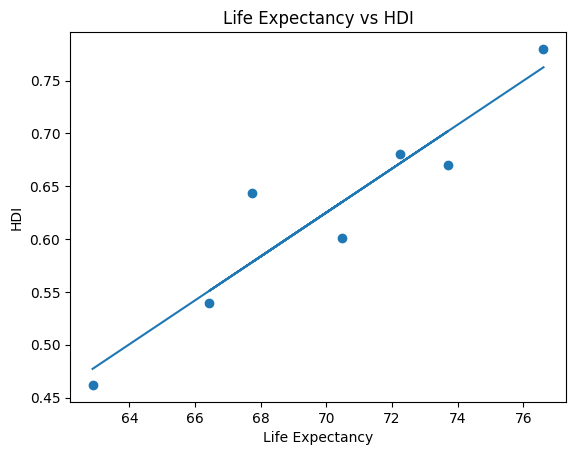

In [48]:
#### 3.4 Metric Relationship Analysis
#Correlation Analysis
corr_gender = south_asia_df['gender_development'].corr(south_asia_df['hdi'])
corr_life = south_asia_df['life_expectancy'].corr(south_asia_df['hdi'])

corr_gender, corr_life

#Gender develipment vs HDI
import numpy as np
plt.figure()
plt.scatter(south_asia_df['gender_development'], south_asia_df['hdi'])
z = np.polyfit(south_asia_df['gender_development'], south_asia_df['hdi'], 1)
p = np.poly1d(z)
plt.plot(south_asia_df['gender_development'], p(south_asia_df['gender_development']))
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Gender Development vs HDI")
plt.show()

#Life expectancy vs HDI
plt.figure()
plt.scatter(south_asia_df['life_expectancy'], south_asia_df['hdi'])
z = np.polyfit(south_asia_df['life_expectancy'], south_asia_df['hdi'], 1)
p = np.poly1d(z)
plt.plot(south_asia_df['life_expectancy'], p(south_asia_df['life_expectancy']))
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("Life Expectancy vs HDI")
plt.show()




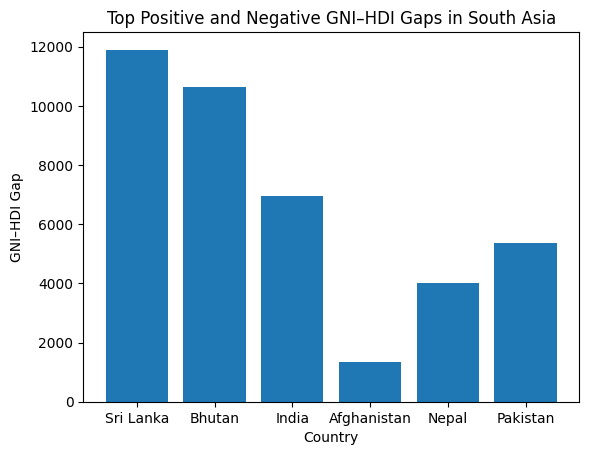

In [49]:
### 3.5 GNI–HDI Gap Analysis
#Gap Calculation & Ranking
south_asia_grouped = south_asia_df.groupby('country', as_index=False).agg({
    'gross_inc_percap': 'mean',
    'hdi': 'mean'
})
south_asia_grouped['GNI_HDI_Gap'] = (
    south_asia_grouped['gross_inc_percap'] - south_asia_grouped['hdi']
)
gap_desc = south_asia_grouped.sort_values(by='GNI_HDI_Gap', ascending=False)
gap_asc = south_asia_grouped.sort_values(by='GNI_HDI_Gap', ascending=True)

gap_desc[['country', 'GNI_HDI_Gap']].head(3), \
gap_asc[['country', 'GNI_HDI_Gap']].head(3)
import matplotlib.pyplot as plt
import pandas as pd

top_gap = pd.concat([gap_desc.head(3), gap_asc.head(3)])

plt.figure()
plt.bar(top_gap['country'], top_gap['GNI_HDI_Gap'])
plt.xlabel("Country")
plt.ylabel("GNI–HDI Gap")
plt.title("Top Positive and Negative GNI–HDI Gaps in South Asia")
plt.show()





###Problem 3: Comparative Regional Analysis|

In [50]:
#3.1 Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("HDI_problem1B.csv", encoding="latin1")
df.head()


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
3,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
4,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


In [51]:
#3.2 Task 1: Creation of Regional Subsets
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

south_asia_df = df[df['country'].isin(south_asia)]
middle_east_df = df[df['country'].isin(middle_east)]

south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

south_asia_df.shape, middle_east_df.shape


((24, 29), (33, 29))

In [52]:
#3.3 Task 2: Descriptive Statistics of HDI
sa_mean = south_asia_df['hdi'].mean()
sa_std = south_asia_df['hdi'].std()

me_mean = middle_east_df['hdi'].mean()
me_std = middle_east_df['hdi'].std()

print("South Asia → Mean:", sa_mean, "Std:", sa_std)
print("Middle East → Mean:", me_mean, "Std:", me_std)
#Interpretation:
"""
The Middle East demonstrates a higher average HDI than South Asia across 2020–2022,
reflecting stronger economic capacity and infrastructure. South Asia shows comparatively
lower HDI levels and greater development vulnerability.
"""


South Asia → Mean: 0.6395833333333333 Std: 0.09827331747496995
Middle East → Mean: 0.7889090909090909 Std: 0.14129476362297624


'\nThe Middle East demonstrates a higher average HDI than South Asia across 2020–2022,\nreflecting stronger economic capacity and infrastructure. South Asia shows comparatively\nlower HDI levels and greater development vulnerability.\n'

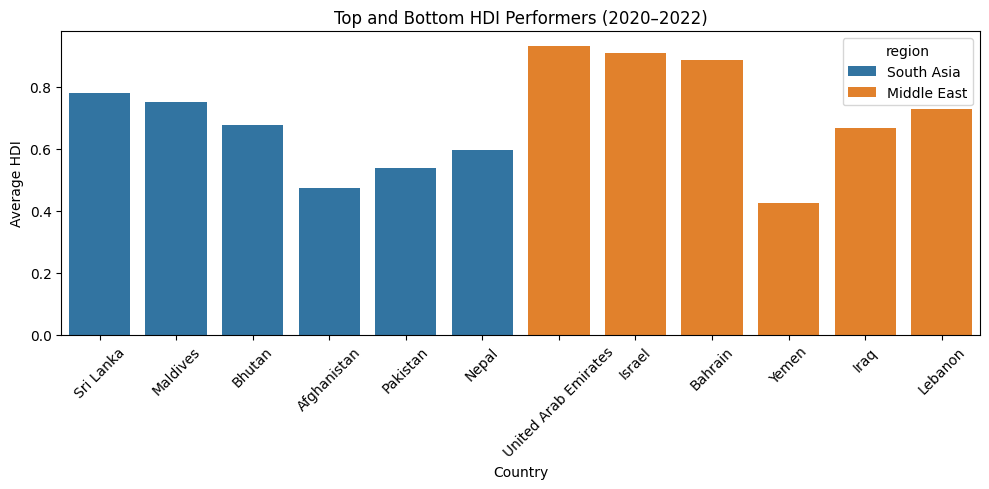

'\nMiddle Eastern countries dominate the top HDI rankings, while South Asian\nnations are more frequently observed among the bottom performers,\nhighlighting persistent regional development inequality.\n'

In [53]:
#3.4 Task 3: Top and Bottom HDI Performers
sa_avg = south_asia_df.groupby('country')['hdi'].mean()
me_avg = middle_east_df.groupby('country')['hdi'].mean()

sa_top = sa_avg.sort_values(ascending=False).head(3)
sa_bottom = sa_avg.sort_values().head(3)

me_top = me_avg.sort_values(ascending=False).head(3)
me_bottom = me_avg.sort_values().head(3)


# Combine data for plotting
plot_df = pd.concat([
    sa_top.reset_index().assign(region="South Asia"),
    sa_bottom.reset_index().assign(region="South Asia"),
    me_top.reset_index().assign(region="Middle East"),
    me_bottom.reset_index().assign(region="Middle East")
], ignore_index=True)

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=plot_df, x='country', y='hdi', hue='region')
plt.title("Top and Bottom HDI Performers (2020–2022)")
plt.ylabel("Average HDI")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#INTERPRETATION
"""
Middle Eastern countries dominate the top HDI rankings, while South Asian
nations are more frequently observed among the bottom performers,
highlighting persistent regional development inequality.
"""


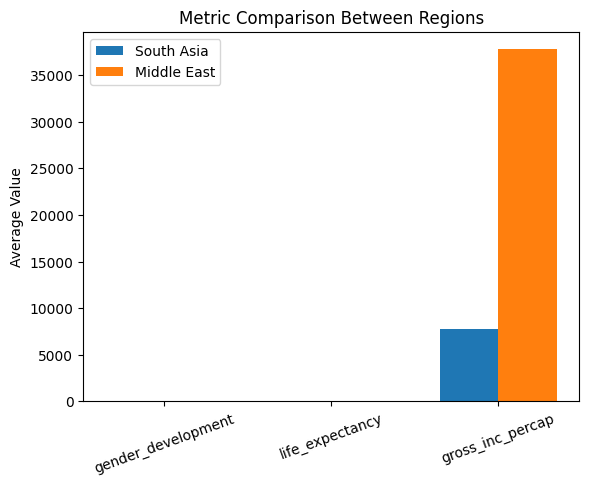

'\nInterpretation:\nGNI per capita displays the largest disparity between the two regions,\nunderscoring the income advantage of Middle Eastern countries relative\nto South Asia.\n'

In [54]:
#3.5 Task 4: Comparison of Key Development Metrics
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_metrics = south_asia_df[metrics].mean()
me_metrics = middle_east_df[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, sa_metrics, width, label="South Asia")
plt.bar(x + width/2, me_metrics, width, label="Middle East")

plt.xticks(x, metrics, rotation=20)
plt.ylabel("Average Value")
plt.title("Metric Comparison Between Regions")
plt.legend()
plt.show()

"""
Interpretation:
GNI per capita displays the largest disparity between the two regions,
underscoring the income advantage of Middle Eastern countries relative
to South Asia.
"""


In [55]:
#3.6 Task 5: HDI Disparity Analysis
sa_range = sa_avg.max() - sa_avg.min()
me_range = me_avg.max() - me_avg.min()

sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print("South Asia → Range:", sa_range, "CV:", sa_cv)
print("Middle East → Range:", me_range, "CV:", me_cv)

"""
South Asia exhibits greater relative variation in HDI,
indicating uneven development across countries, while Middle Eastern nations
show more concentrated development outcomes.
"""


South Asia → Range: 0.3056666666666666 CV: 0.1536520924690084
Middle East → Range: 0.5063333333333333 CV: 0.17910145193048382


'\nSouth Asia exhibits greater relative variation in HDI,\nindicating uneven development across countries, while Middle Eastern nations\nshow more concentrated development outcomes.\n'

In [56]:
#3.7 Task 6: Correlation Analysis
print("South Asia HDI–Gender:", south_asia_df['hdi'].corr(south_asia_df['gender_development']))
print("South Asia HDI–Life:", south_asia_df['hdi'].corr(south_asia_df['life_expectancy']))

print("Middle East HDI–Gender:", middle_east_df['hdi'].corr(middle_east_df['gender_development']))
print("Middle East HDI–Life:", middle_east_df['hdi'].corr(middle_east_df['life_expectancy']))


South Asia HDI–Gender: 0.8742177004831327
South Asia HDI–Life: 0.9387641385416623
Middle East HDI–Gender: 0.9356697525724119
Middle East HDI–Life: 0.9331227568940162


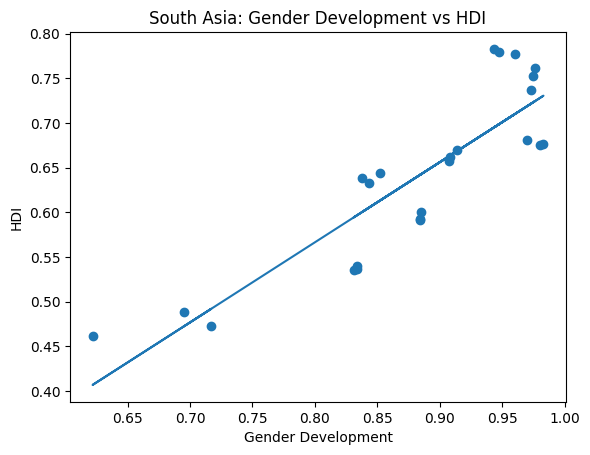

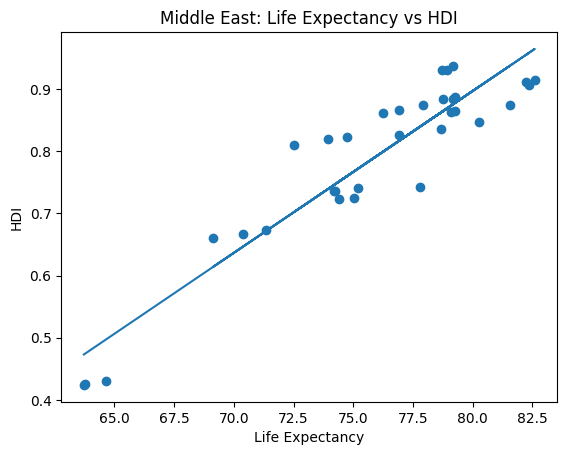

'\nLife expectancy shows a stronger positive correlation with HDI in both regions,\nconfirming health outcomes as a critical determinant of human development.\n'

In [57]:
#3.8 Task 6 (Continued): Scatter Plots with Trendlines
def scatter_trend(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.scatter(x, y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

scatter_trend(
    south_asia_df['gender_development'],
    south_asia_df['hdi'],
    "Gender Development",
    "HDI",
    "South Asia: Gender Development vs HDI"
)

scatter_trend(
    middle_east_df['life_expectancy'],
    middle_east_df['hdi'],
    "Life Expectancy",
    "HDI",
    "Middle East: Life Expectancy vs HDI"
)
"""
Life expectancy shows a stronger positive correlation with HDI in both regions,
confirming health outcomes as a critical determinant of human development.
"""

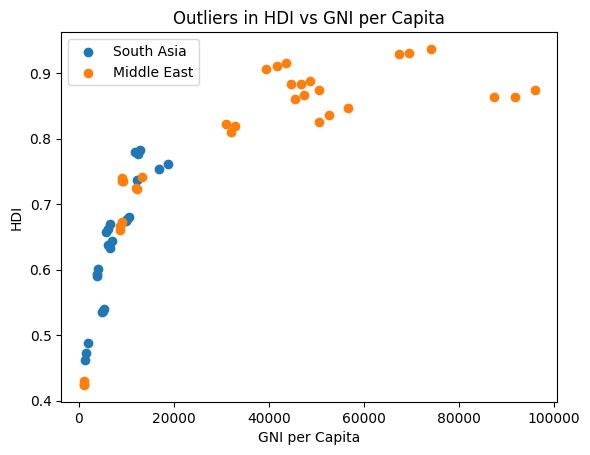

'\nExtreme income-rich Middle Eastern countries and development-challenged South Asian\ncountries appear as outliers, highlighting structural economic and social contrasts\nbetween the regions.\n'

In [58]:
#3.9 Task 7: Outlier Detection Using 1.5 × IQR Rule
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the original dataset
df_original = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")

# Filter for years 2020-2022 to recreate hdi_1b_df (named df here for consistency with original cell)
df = df_original[df_original['year'].isin([2020, 2021, 2022])].copy()

# Remove CSV index artifact if present (from problem 1B cleaning)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert numeric columns (from problem 1B cleaning)
numeric_cols = [
    'hdi',
    'gross_inc_percap',
    'life_expectancy',
    'gender_development'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle duplicates and missing essentials (from problem 1B cleaning)
df.drop_duplicates(inplace=True)
df.dropna(subset=['hdi', 'year', 'country'], inplace=True)

# Define regional lists (as per 3.2 Task 1)
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Create regional dataframes
south_asia_df = df[df['country'].isin(south_asia)].copy()
middle_east_df = df[df['country'].isin(middle_east)].copy()

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)

south_asia_df['Outlier'] = detect_outliers(south_asia_df['hdi']) | \
                           detect_outliers(south_asia_df['gross_inc_percap'])

middle_east_df['Outlier'] = detect_outliers(middle_east_df['hdi']) | \
                            detect_outliers(middle_east_df['gross_inc_percap'])

plt.figure()
plt.scatter(south_asia_df['gross_inc_percap'], south_asia_df['hdi'], label="South Asia")
plt.scatter(middle_east_df['gross_inc_percap'], middle_east_df['hdi'], label="Middle East")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Outliers in HDI vs GNI per Capita")
plt.legend()
plt.show()

"""
Extreme income-rich Middle Eastern countries and development-challenged South Asian
countries appear as outliers, highlighting structural economic and social contrasts
between the regions.
"""